# Exercises on Image Processing

In [8]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### Loading the image

(175, 288, 3)

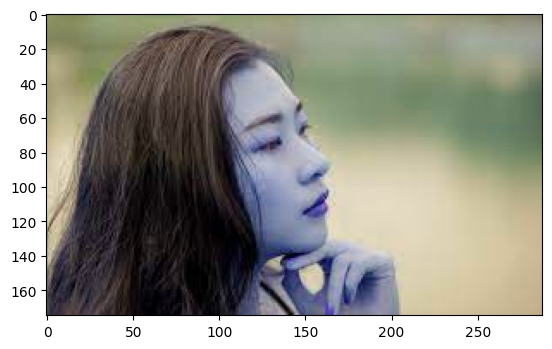

In [10]:
img = cv.imread('portrait_lady.png', cv.IMREAD_COLOR)
plt.imshow(img)
img.shape

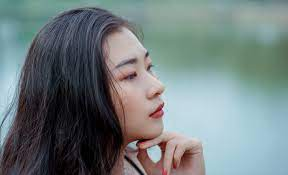

In [11]:
from google.colab.patches import cv2_imshow
# cv.imshow(img) # doesn't work on colab, but, can be used otherwise
cv2_imshow(img)

### Changing the colorspace to HSV

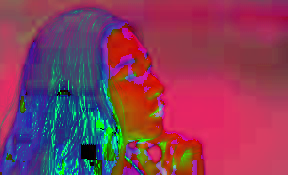

(175, 288, 3)


In [13]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv2_imshow(hsv)
print(hsv.shape)

### 1) Enhancing the contrast of the image through Histogram Equalization

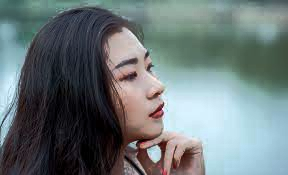

In [14]:
# Equivalise the histogram
new_value = cv.equalizeHist(hsv[..., 2])

# Update the value channel
hsv[:, :, 2] = new_value

# Convert image back to BGR
new_rgb_image = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Display
cv2_imshow(new_rgb_image)

### 2)  Extracting the mask of the lady from the image

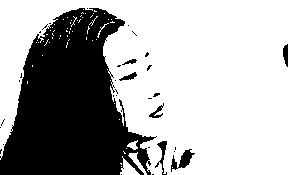

In [81]:

img = cv.imread('portrait_lady.png', cv.IMREAD_GRAYSCALE)
ret2, th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
cv2_imshow(th2)

### 3) Extracting the edges of just the person using only the morphological operations

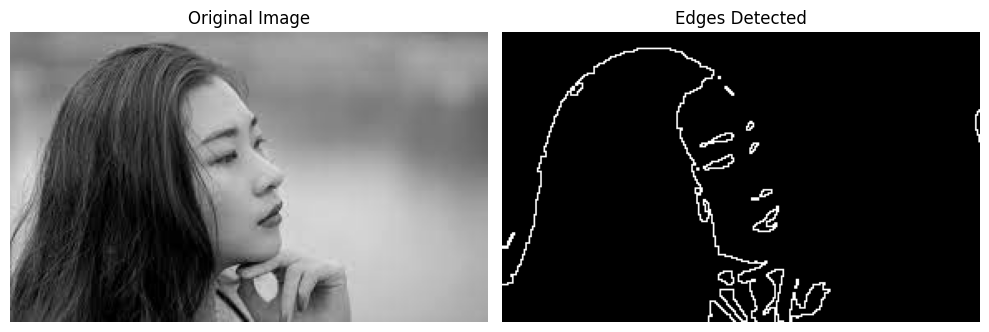

In [83]:




# Applying binary thresholding
_, binary = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

# Define a kernel size
kernel = np.ones((2,2), np.uint8)

# Perform morphological operations to clean the binary image
# Erosion to remove small white noise, then dilation to restore the object
binary = cv.erode(binary, kernel, iterations=2)
binary = cv.dilate(binary, kernel, iterations=2)

# Extract edges using morphological gradient
edges = cv.morphologyEx(binary, cv.MORPH_GRADIENT, kernel)

# Display the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Edges Detected')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


###4) Using the standard edge detector

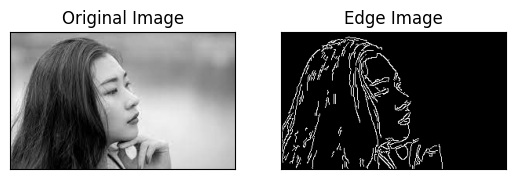

In [46]:
img = cv.imread('portrait_lady.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 5) Using Grabcut to segment the given image

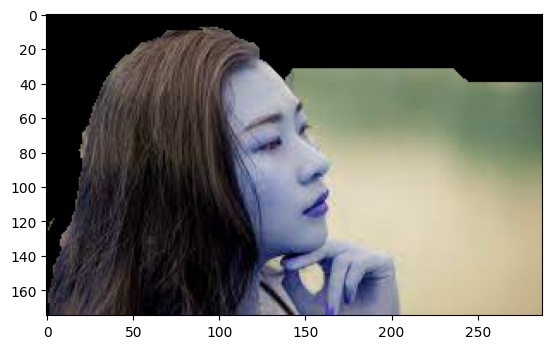

In [71]:
img = cv.imread('portrait_lady.png')

mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (1,1,288,175)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
# ,plt.colorbar(),plt.show()